# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
previsao_de_renda = pd.read_csv('previsao_de_renda.csv')
previsao_de_renda

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [28]:
# verificando quais são as variáveis qualitativas
previsao_de_renda.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [29]:
# separando um df com apenas variáveis qualitativas 

colunas_qlt = previsao_de_renda[['sexo', 'posse_de_veiculo', 
                                           'posse_de_imovel', 'tipo_renda', 'educacao', 
                                           'estado_civil', 'tipo_residencia', 'mau']]

colunas_qlt

,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,M,True,True,Empresário,Secundário,Casado,Casa,False
2,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,F,True,False,Empresário,Secundário,Casado,Casa,False
4,M,False,False,Assalariado,Secundário,Casado,Casa,False
...,...,...,...,...,...,...,...,...
14995,M,True,True,Assalariado,Secundário,Casado,Casa,False
14996,M,True,True,Servidor público,Superior completo,Casado,Estúdio,False
14997,F,True,True,Assalariado,Secundário,Casado,Casa,False
14998,F,False,True,Servidor público,Superior completo,Casado,Casa,False


In [30]:
# mudar o tipo da variável data_ref

previsao_de_renda['data_ref'] = pd.to_datetime(previsao_de_renda['data_ref'])
previsao_de_renda.dtypes

Unnamed: 0                        int64
data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                   bool
posse_de_imovel                    bool
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
mau                                bool
renda                           float64
dtype: object

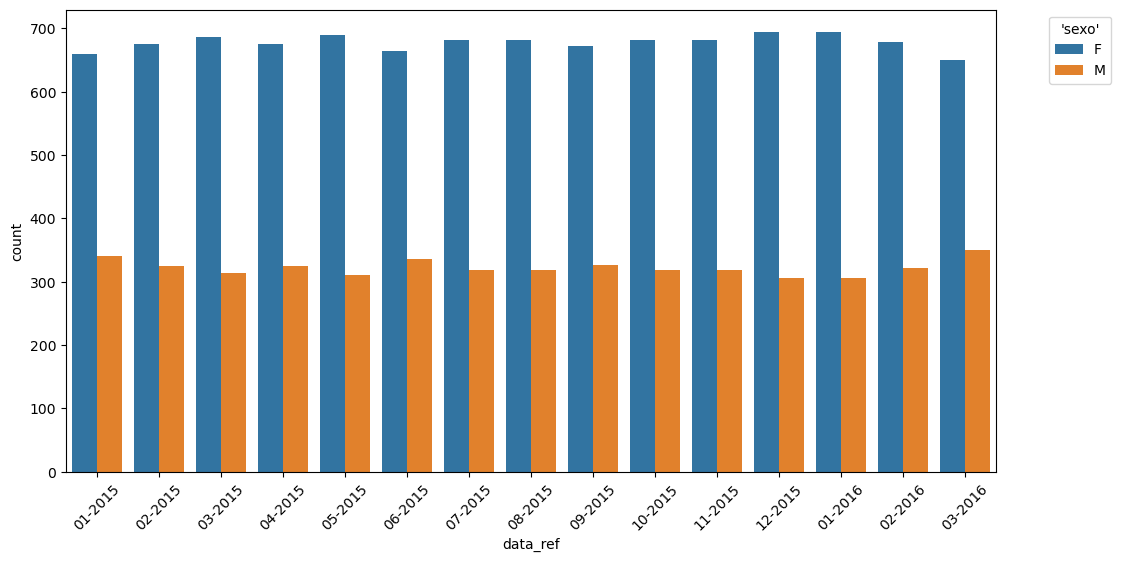

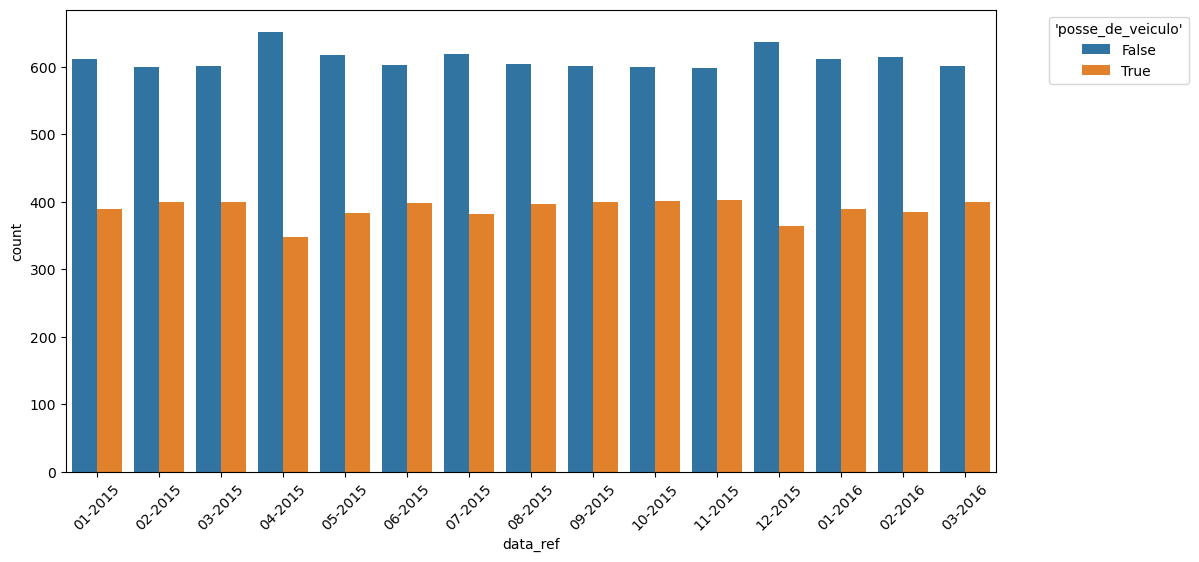

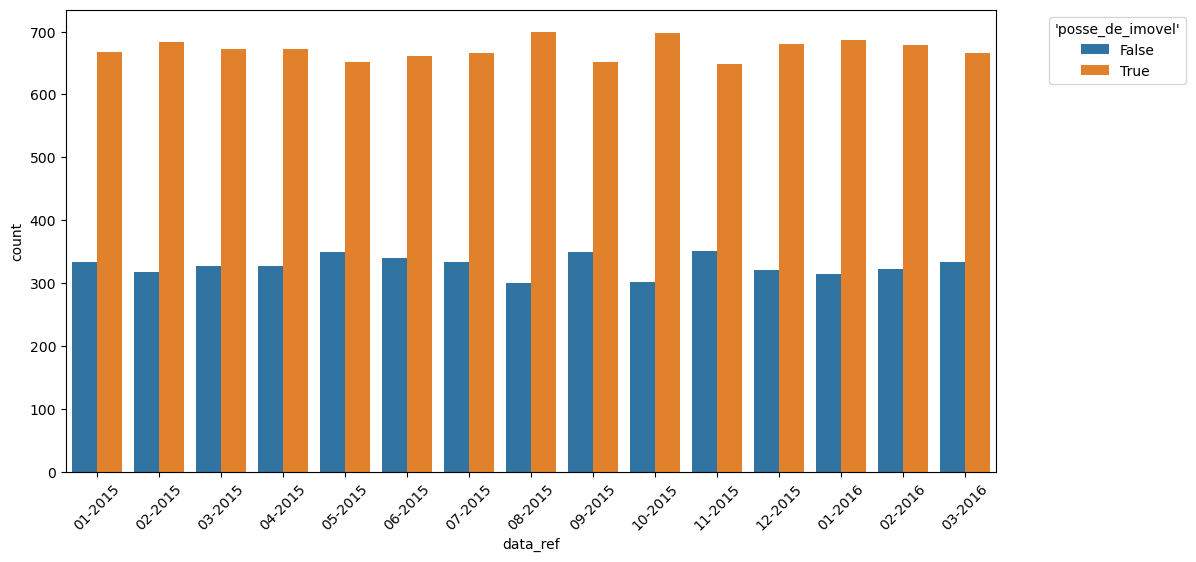

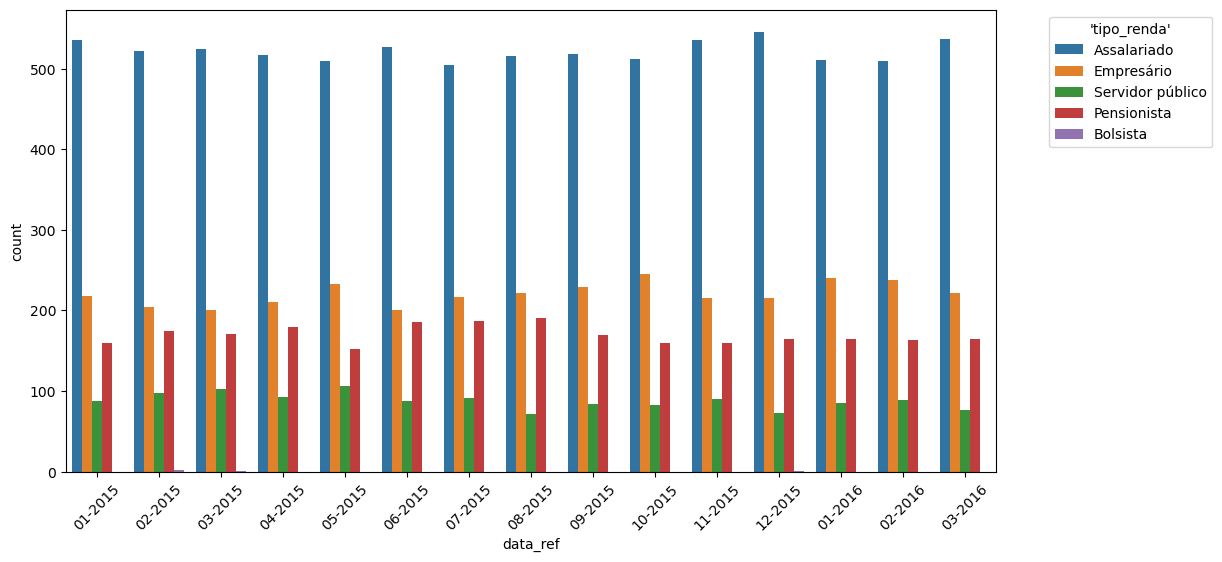

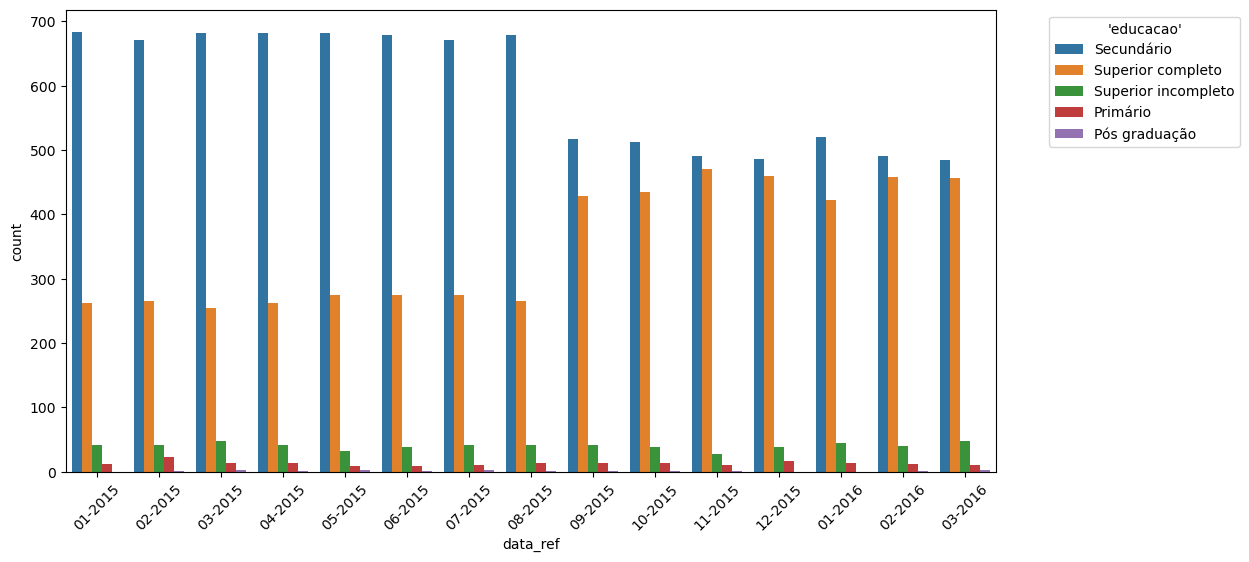

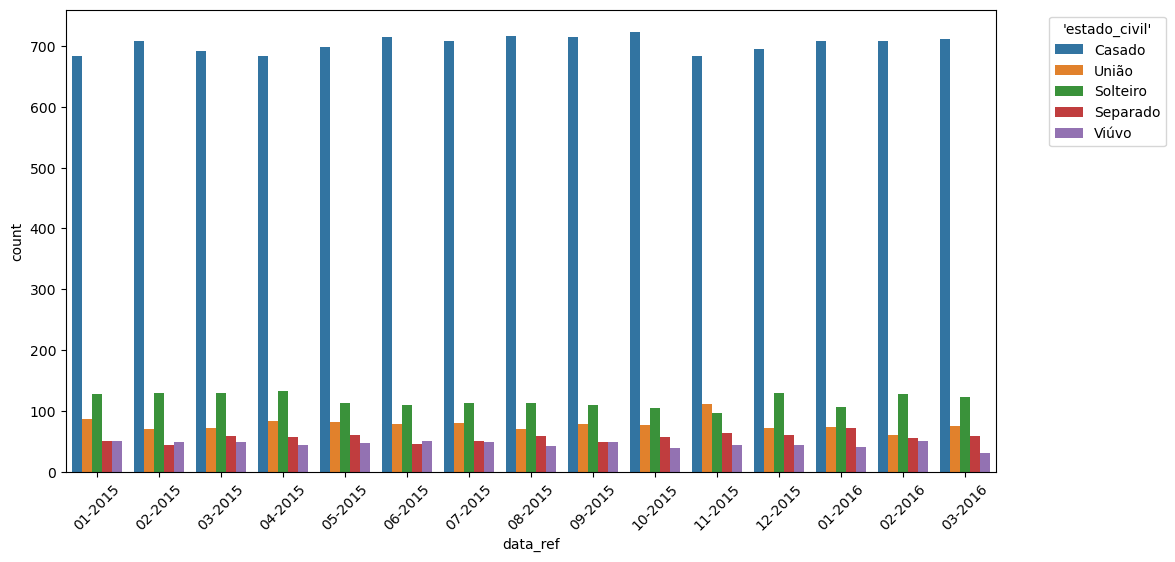

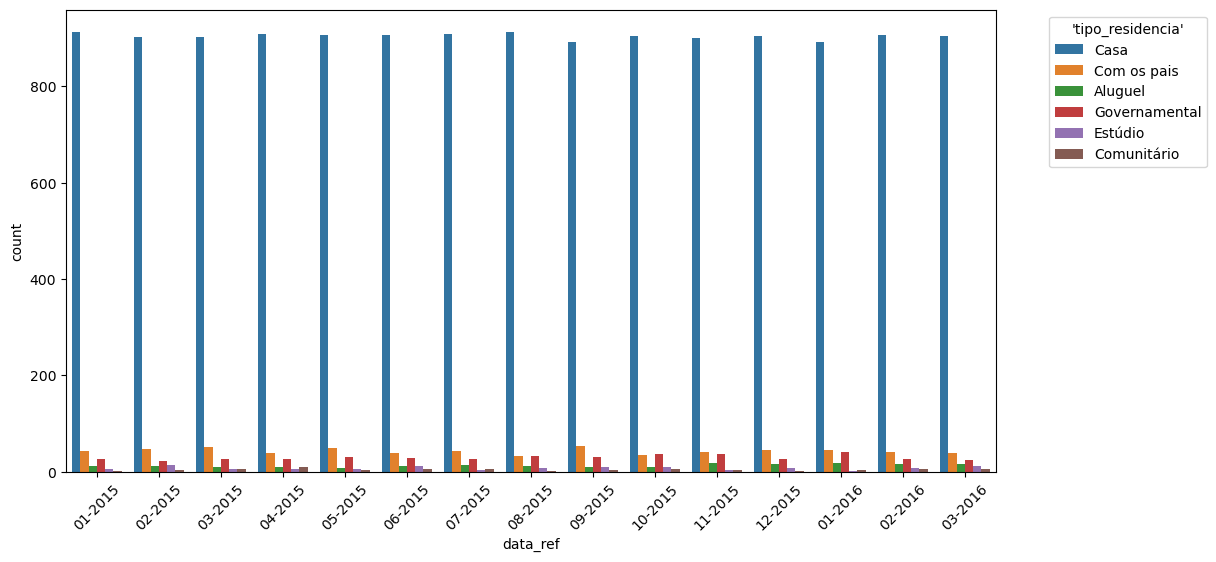

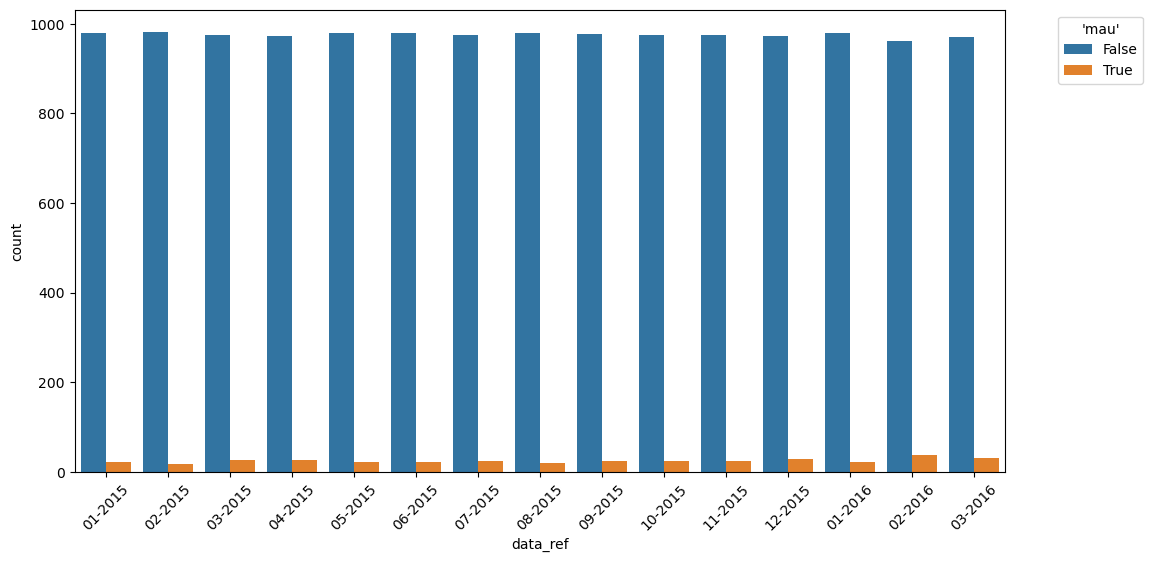

In [48]:
plt.rc('figure', figsize=(12,6))

for col in colunas_qlt:
    ax = sns.countplot(x='data_ref',  hue = col, data=previsao_de_renda)
    tick_labs = previsao_de_renda['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
    
    ax.set_xticks(list(range(previsao_de_renda['data_ref'].nunique())))
    ax.set_xticklabels(tick_labs, rotation=45)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, title=f"'{col}'")

    plt.show()


A única alteração significativa presente nos gráficos está relacionada à variável ``educação``, indicando o nível de escolaridade dos clientes. Até agosto de 2015 havia um predomínio do nível secundário e a partir de setembro do mesmo ano o nível secundário diminuiu, aumentando o nível superior completo (provavelmente são pessoas que concluíram a graduação e alteraram o nível de escolaridade). 

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

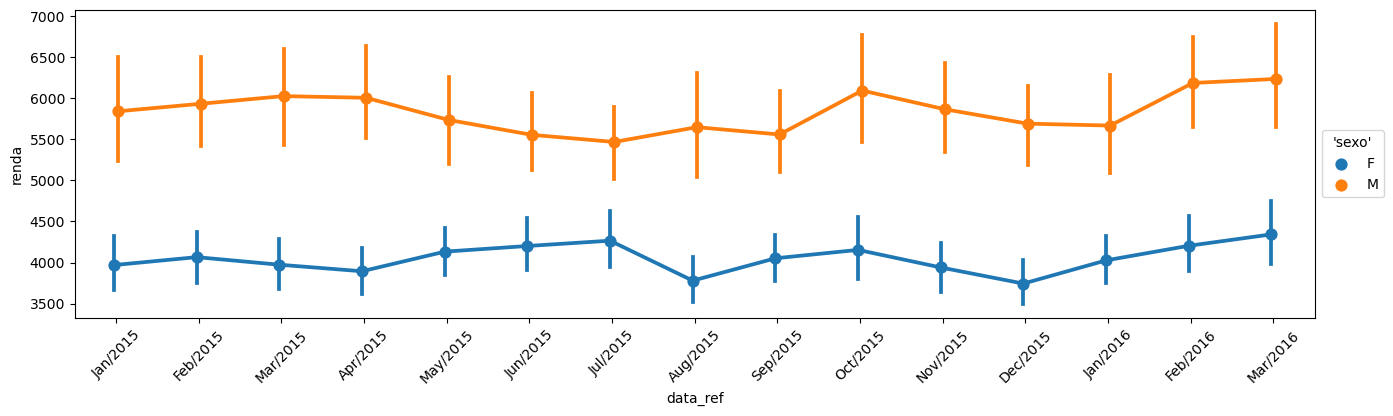

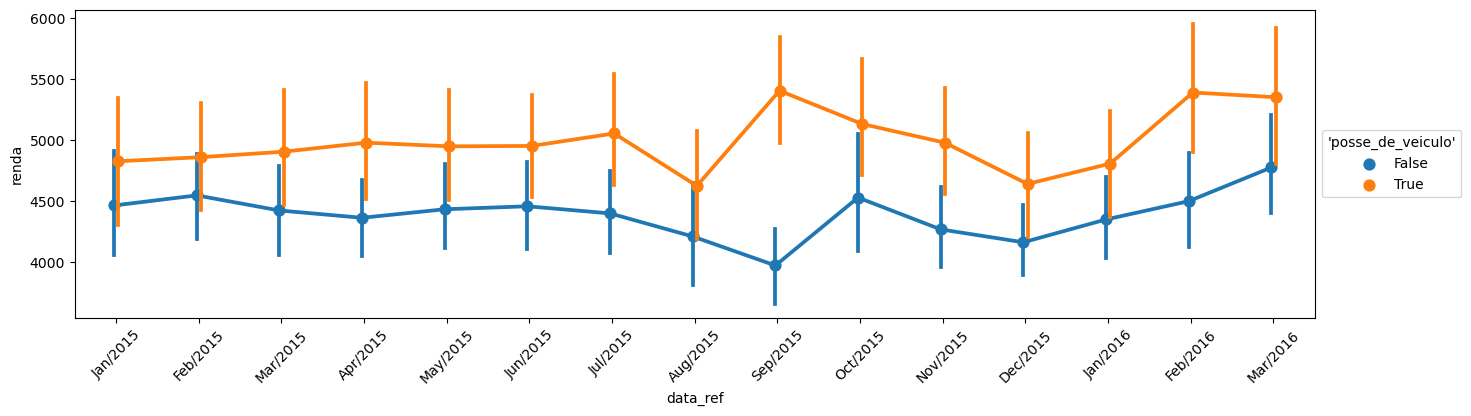

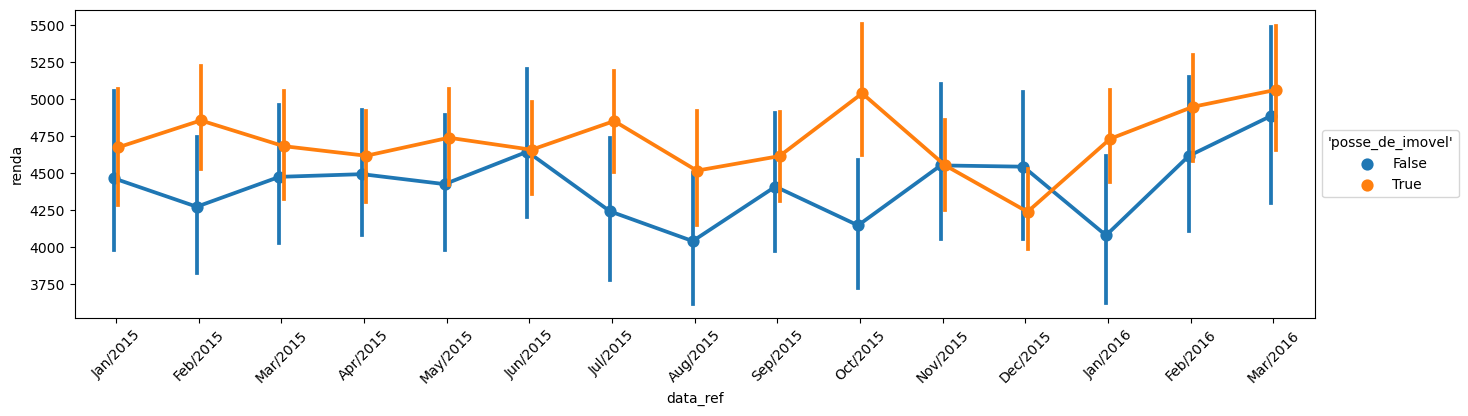

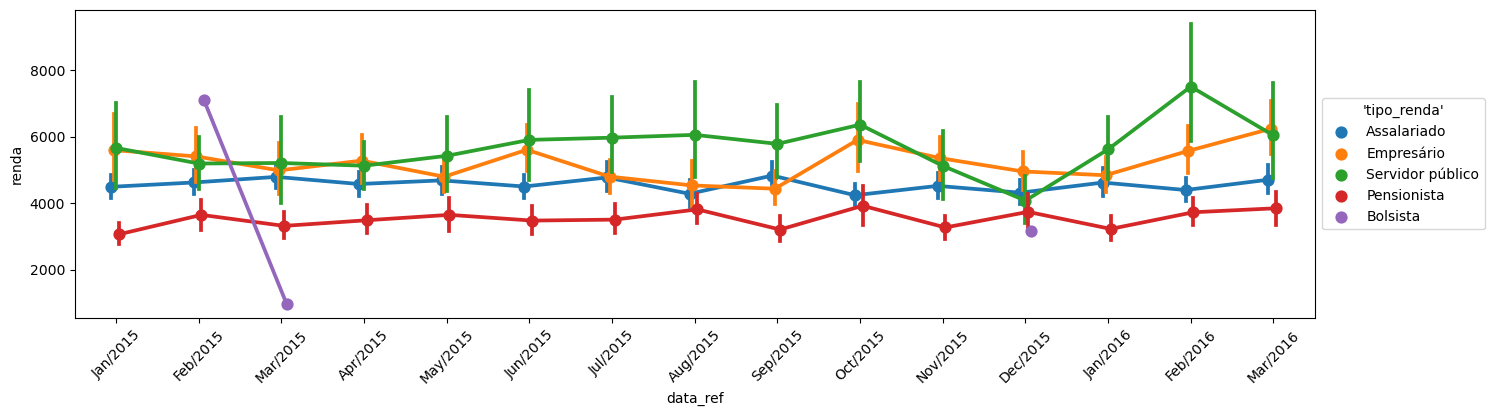

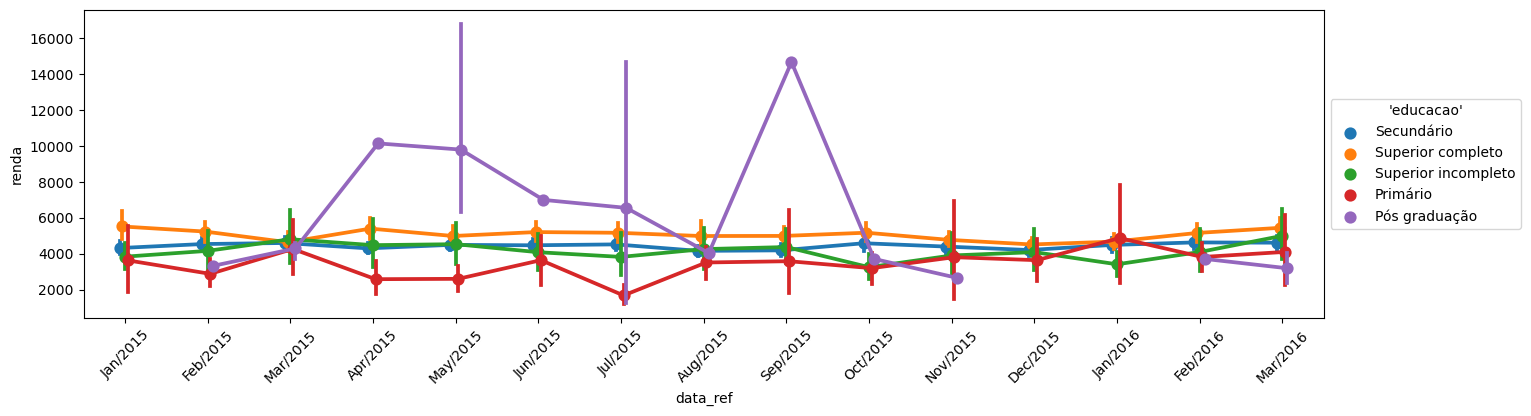

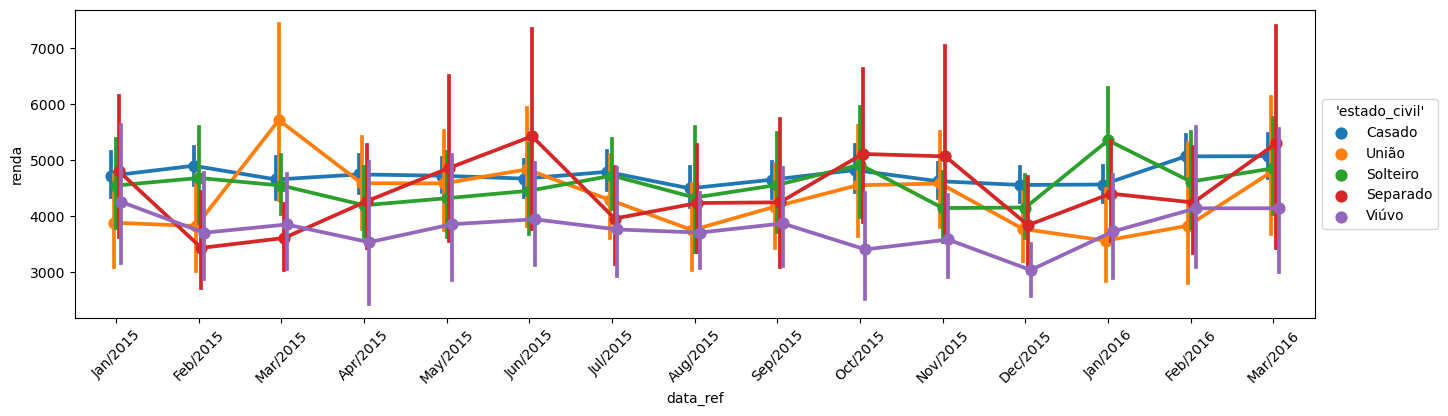

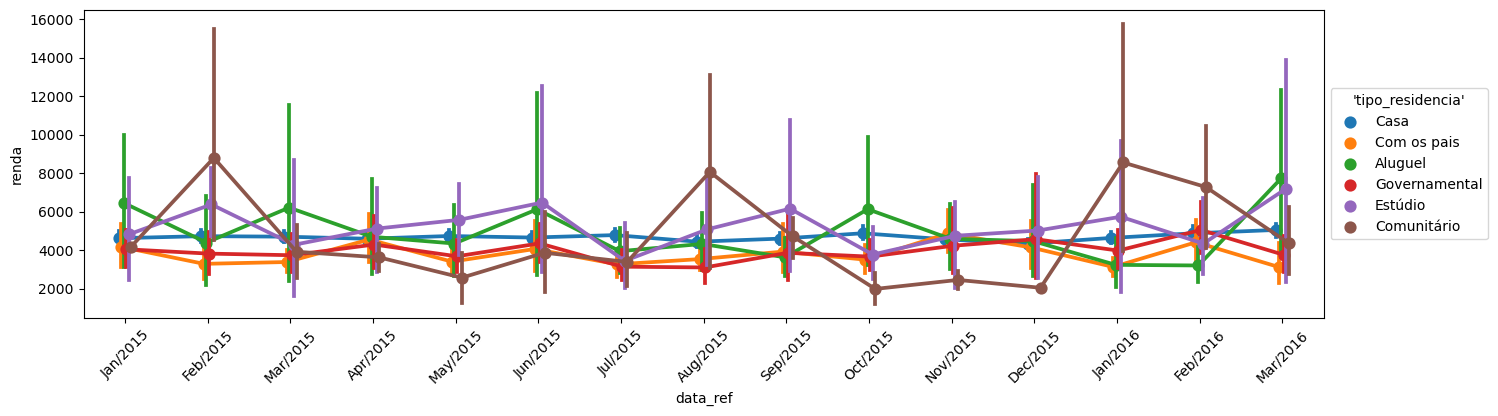

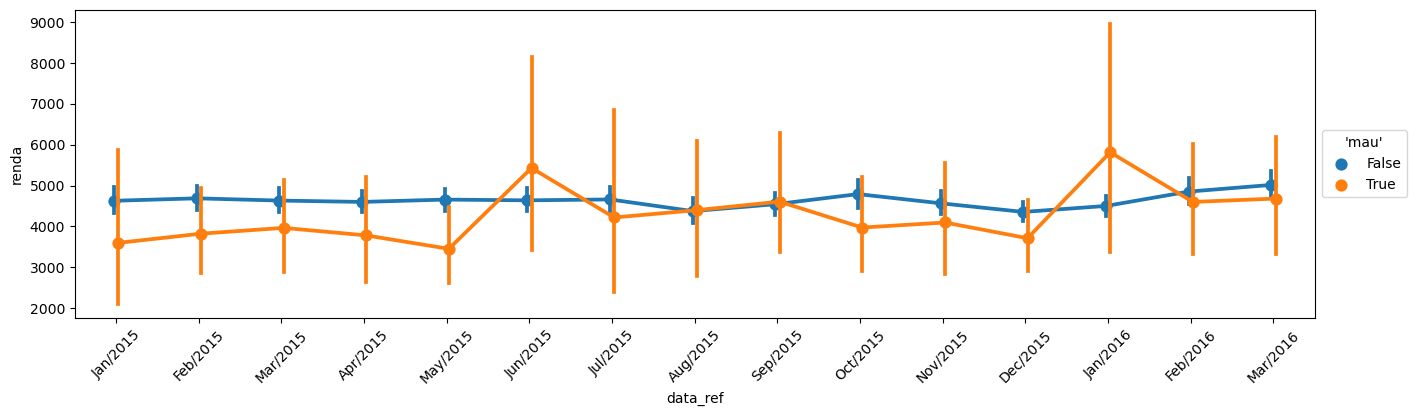

In [54]:
plt.rc('figure', figsize=(16,4))

for col in colunas_qlt:
    fig, axes = plt.subplots(1,1)
    fig.subplots_adjust(wspace=.6)
    
    tick_labels = previsao_de_renda['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()


    # perfis médios no tempo:
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=previsao_de_renda, dodge=True, errorbar=('ci', 95))
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    ax1.legend(bbox_to_anchor=(1,.5), loc=6, title=f"'{col}'")

    plt.show()

Pelos gráficos mostrados não parece haver grandes mudanças - além da escolaridade, já citada no tópico anterior. Ainda assim, a mudança de escolaridade parece não ter afetado a renda.
Acredito que essas variáveis possam ser utilizadas em um modelo. 